In [1]:
push!(LOAD_PATH, joinpath(@__DIR__, "../../../lib"));

In [2]:
using OrdinaryDiffEq

In [3]:
include("motion-nd.jl")

evolve (generic function with 2 methods)

In [4]:
const ωs3 = (2π * 700e3, 2π * 2.75e6, 2π * 2.85e6)
const ηs3 = (0.066, 0.024, 0.023)

(0.066, 0.024, 0.023)

In [13]:
ts, ψs, sys = @time evolve(0, ωs3, ηs3, spindown(SpinBasis(1//2)), (10, 10, 10),
                           2π * 100e3, 30e-6);

N = 798
 22.937768 seconds (8.43 M allocations: 502.686 MiB, 0.32% gc time, 5.22% compilation time)


In [12]:
ts, ψs, sys = @time evolve(0, ωs3, ηs3, spindown(SpinBasis(1//2)), (10, 10, 10),
                           2π * 20e3, 30e-6, alg=Vern9());

N = 165
  6.454291 seconds (42.32 M allocations: 2.405 GiB, 15.75% gc time, 74.07% compilation time)


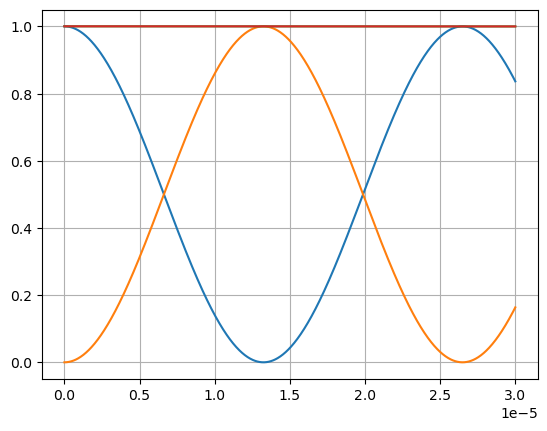

In [13]:
rhos = [ptrace(ψ, [1]) for ψ in ψs];
plot(ts, [abs(rho.data[2, 2]) for rho in rhos])
plot(ts, [abs(rho.data[1, 1]) for rho in rhos])
plot(ts, [abs(rho.data[1, 1]) + abs(rho.data[2, 2]) for rho in rhos])
plot(ts, [norm(ψ)^2 for ψ in ψs])
grid()